# bayesian inference
### 1
* Normalization is $ \sqrt\frac{\ln a}{2\pi} $
* this can be seen by writing $a = e^{\ln(a)}$
* which gives us $p(x|a) \propto e^{-\alpha*x^2}$, where $\alpha(a) \equiv \frac{\ln(a)}{2}$
* Now, use the well known gaussian normalization $N(a) = \sqrt\frac{\alpha}{\pi} = \sqrt\frac{ \ln a}{2\pi} $ 

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## 3

* bayes theorem says that $P(a|\{x\}) = \frac{P(a)P(\{x\}|a)}{P(\{x\})} $
* neither the prior nor the normalization depend on $a$, so they amount to an irrelevant prefactor, $\sqrt{2\pi} B$
* Thus, we can write our posterior (assuming the trials are independent) as: 
$$ P(a|\{x\}) = B P(\{x\}|a) =\Pi_{i=1}^N \left( B \sqrt{\ln(a)} a^\frac{-x_i^2}{2} \right) =\left( B\sqrt{\ln(a)}\right)^N a^\frac{-\frac{1}{2} \sum x_i^2}{2} $$
* lets write a function that evaluates the prior at a bunch of different a values given an input data set. We'll ignore B, since it's going away anyway


In [4]:
def posterior(a, data):
    n = len(data)
    ss_data = sum(np.square(data)) 
    norm = (np.sqrt(np.log(a)))**n
    return norm * a**(-ss_data/2)

## 4
* the cell below is number 4, I think its pretty self explanatory.

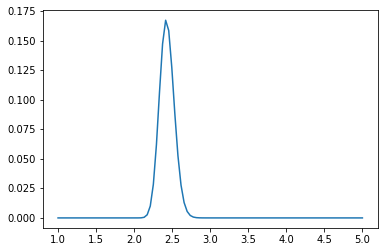

In [5]:
D=1000
data = np.random.normal(0,1,D)

a_range= np.linspace(1,5,100)

post = posterior(a_range, data)

plt.plot(a_range, post/np.sum(post))

## 5

Here we define a function to institute the metropolis algorith, as shown in class

1. inputs are a current value a0, a candidate value a1 and the data

2. decide a threshhold based on the relative posterior probability of a0 and a1

3. generate a number and accept(return True) or reject(return False) the candidate based on a random number generated b/w 0 and 1

In [6]:
def metropolis(a0, a1, data):
    
    def get_prob(a):
        return posterior(a, data)
    
    threshhold = min(1, get_prob(a1)/get_prob(a0))
    decide=np.random.uniform(0,1,1)
    
    if threshhold > decide:
        return(True)
    else:
        return(False)

Now, we make a chain based on the metropolis algorith. I first made a prior_a function that feeds into it in case we want to mess with the prior on a later. The chain function is very simple, since most of the work is done in other functions. We keep geenrating new candidates based on the prior on a, and then accept/reject adding them to the chain by using the metropolis function. Terminates when our chain reasos the target length.

In [12]:


def chain(N, data, generating_variance=1/2):
    chain=[]
    chain.append(np.random.uniform(1,5))
    a0 = chain[0]
    while len(chain) < N:
        a1 = np.random.normal(a0,generating_variance)
        if metropolis(a0, a1, data):
            a0 = a1
        chain.append(a1)
    return(chain)
            
        
    

In [21]:
chn = chain(2000, data)

## 6

Text(0.5, 1.0, 'Trace Plot')

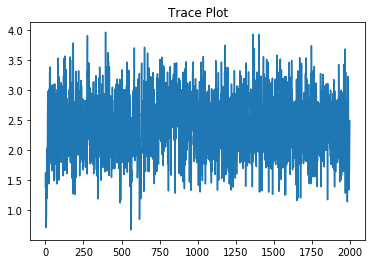

In [22]:
plt.plot(chn)
plt.title('Trace Plot')

## 7

Text(0.5, 1.0, 'Histogram')

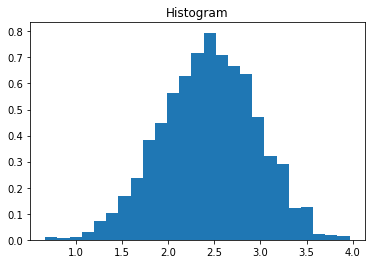

In [24]:
plt.hist(chn, density=True, bins=25)
plt.title('Histogram')